# Описание  одиночного набора данных

In [36]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [37]:
from collections import Counter
import matplotlib.pyplot as plt

In [38]:
friend_counts = Counter(num_friends)
xs = range(101)                         # Максимум равен 100
ys = [friend_counts[x] for x in xs]     # Высота - число друзей

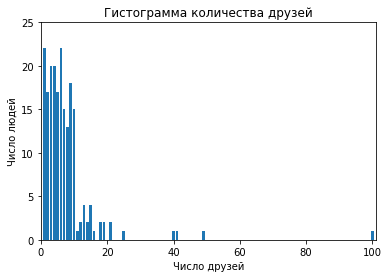

In [39]:
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Гистограмма количества друзей")
plt.xlabel("Число друзей")
plt.ylabel("Число людей");

In [40]:
num_points = len(num_friends) 

In [41]:
largest_value = max(num_friends)            
smallest_value = min(num_friends)  

In [42]:
print(num_points, largest_value, smallest_value)

204 100 1


In [43]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           
second_smallest_value = sorted_values[1]    
second_largest_value = sorted_values[-2]

In [44]:
print(smallest_value, second_largest_value, second_smallest_value)

1 49 1


In [45]:
print(sorted_values)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 18, 18, 19, 19, 21, 21, 25, 40, 41, 49, 100]


# Центральные тенденции

In [46]:
from typing import List

In [47]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

In [48]:
mean(num_friends)

7.333333333333333

In [49]:
# Символы подчеркивания указывают на то, что эти функции являются приватными
# тк они предназначены для вызова 
# из нашей функции median, а не другими людьми
# использующими нашу статистическую библиотеку

In [50]:
def _median_odd(xs: List[float]) -> float:
    """Если len(xs) является нечетной, то медиана - это срединный элемент"""
    return sorted(xs)[len(xs) // 2]

In [51]:
def _median_even(xs: List[float]) -> float:
    """Если len(xs) является четной, то она является средним значением двух срединных элементов"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2 
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [52]:
def median(v: List[float]) -> float:
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [53]:
print(median([1, 10, 2, 9, 5])) # 5
print(median([1, 9, 2, 10])) # (2 + 9) / 2 = 5.5

5
5.5


In [54]:
print(median(num_friends)) # 6

6.0


In [55]:
def quantile(xs: List[float], p: float) -> float:
    """Возвращает значение p-го процентиля в x"""
    p_index = int(p * len(xs)) # Преобразует % в индекс списка
    return sorted(xs)[p_index]

In [56]:
print(quantile(num_friends, 0.10)) # 1
print(quantile(num_friends, 0.25)) # 3
print(quantile(num_friends, 0.75)) # 9
print(quantile(num_friends, 0.90)) # 13

1
3
9
13


In [57]:
def mode(x: List[float]) -> List[float]:
    """Возвращает список, т.е. может быть больше 1 моды"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [58]:
print(set(mode(num_friends))) # {1, 6}

{1, 6}


# Вариация

In [59]:
# Ключевое слово "range" (размах) в Python уже имеет
# свой смысл, поэтому выберем другое

In [60]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs) # Размах равен 0 когда max и min эквивалентны

In [62]:
print(data_range(num_friends)) # 99

99
